# Step 1: Import pyspark and initialize Spark

In [1]:
from pyspark import SparkContext, SparkConf

conf = SparkConf()
conf.set("spark.app.name", "FIT5202 Assignment 1 Part A")
conf.set("spark.master", "local[*]")

sc = SparkContext.getOrCreate(conf=conf)

if (sc is None):
    sc = SparkContext(conf=conf)


# Step 2: Create Resilient Distribute Datasets (RDDs)

In [2]:
agileRDD = sc.textFile("Agile\ Processes\ \ in\ Software\ Engineering\ \ and\ Extreme\ Programming.txt")
scrumRDD = sc.textFile("Scrum\ Handbook.txt")
print("Total number of lines:")
print("\tAgile Processes in Software Engineering and Extreme Programming.txt: {0} lines".format(agileRDD.count()))
print("\tScrum Handbook.txt: {0} lines".format(scrumRDD.count()))

Total number of lines:
	Agile Processes in Software Engineering and Extreme Programming.txt: 21569 lines
	Scrum Handbook.txt: 4617 lines


# Step 3: Cleaning/Manupulating text

In [3]:
import re
agileCleanedRDD = agileRDD.map(lambda x: re.sub("[^a-zA-Z ]+", "", x.lower()).strip()) #did not deleted the empty line as not required for the task
print("Book 1 cleaned data:", agileCleanedRDD.take(40))

Book 1 cleaned data: ['lnbip', '', '', 'i helen sharp', '', 'tracy hall eds', '', 'agile processes', 'in software engineering', 'and extreme programming', '', 'th international conference xp', 'edinburgh uk may', 'proceedings', '', '', 'springer open', '', '', '', '', '', '', '', 'lecture notes', '', 'in business information processing', '', '', 'series editors', '', 'wil van der aalst', '', 'eindhoven technical university eindhoven the netherlands', 'john mylopoulos', '', 'university of trento povo italy', 'michael rosemann', '', 'queensland university of technology brisbane qld australia']


In [5]:
scrumCleanedRDD = scrumRDD.map(lambda x: re.sub("[^a-zA-Z ]+", "", x.lower()).strip())
print("Book 2 cleaned data:", scrumCleanedRDD.take(40))

Book 2 cleaned data: ['jeff sutherlands', '', 'scrum handbook', '', '', '', '', 'everything', 'you need', 'to know', 'to start', '', 'a scrum project', 'in your', 'organization', '', 'scrum', '', 'training', '', 'institute', '', 'm w press', '', '', '', 'this book is dedicated to nobel laureate muhammad yunus and the', 'grameen bank for originating microenterprise development and the', 'accion international presidents advisory board responsible for much of', 'microenterprise development in the western hemisphere', '', 'the strategy for bootstrapping the poor out of poverty has been', 'a model for freeing hundreds of thousands of software developers from', 'developer abuse caused by poor management practices', '', 'thanks to the reviewers of the text who include among many others', '', 'tom poppendieck', '', 'hen rick kniberg']


# Step 4: Transforming the Data/Counting the words

In [6]:
agileWordRDD = agileCleanedRDD.flatMap(lambda x: x.split(' ')).filter(lambda x: x != '')
agileResult = agileWordRDD.map(lambda x: (x, 1)).reduceByKey(lambda x,y: x + y)
agileSortedResult = agileResult.sortBy(lambda x: x[1], ascending=False)
print("Book1 Transformed data and count:", agileSortedResult.take(20))

Book1 Transformed data and count: [('the', 8145), ('and', 3965), ('of', 3944), ('to', 3714), ('in', 3076), ('a', 2701), ('is', 1539), ('that', 1355), ('for', 1194), ('as', 1028), ('on', 1015), ('we', 975), ('with', 969), ('software', 922), ('this', 915), ('are', 784), ('agile', 748), ('it', 741), ('development', 737), ('was', 711)]


In [7]:
scrumWordRDD = scrumCleanedRDD.flatMap(lambda x: x.split(' ')).filter(lambda x: x != '')
scrumResult = scrumWordRDD.map(lambda x: (x, 1)).reduceByKey(lambda x,y: x + y)
scrumSortedResult = scrumResult.sortBy(lambda x: x[1], ascending=False)
print("Book2 Transformed data and count:", scrumSortedResult.take(20))

Book2 Transformed data and count: [('the', 1238), ('of', 537), ('and', 534), ('to', 477), ('a', 451), ('scrum', 395), ('in', 360), ('is', 348), ('team', 260), ('product', 232), ('for', 195), ('that', 181), ('it', 165), ('on', 149), ('sprint', 146), ('this', 142), ('with', 132), ('as', 124), ('are', 119), ('by', 118)]


# # Step 5: Removing Stop Words

In [8]:
# !pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
listOfStopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
agileNoStopRDD = agileSortedResult.filter(lambda x: x[0] not in stopwords.words('english'))
# agileNoStopRDD.take(20)

In [12]:
scrumNoStopRDD = scrumSortedResult.filter(lambda x: x[0] not in listOfStopwords)
# scrumNoStopRDD.take(20)

In [13]:
agileUniqueRDD = agileNoStopRDD.distinct()
scrumUniqueRDD = scrumNoStopRDD.distinct()
print("Number of unique word in each rdd:")
print("\tagileUniqueRDD: {0} words".format(agileUniqueRDD.count()))
print("\tscrumUniqueRDD: {0} words".format(scrumUniqueRDD.count()))

Number of unique word in each rdd:
	agileUniqueRDD: 9611 words
	scrumUniqueRDD: 2936 words


# Step 06: Find the averae occurrence of a word

In [20]:
agileTotWords = agileUniqueRDD.map(lambda x: x[1]).sum()
AverageOccuranceAgile = round(agileTotWords/agileUniqueRDD.count(),2)
print("Book 1 Average Occurance: {0} times".format(AverageOccuranceAgile))

scrumTotWords = scrumUniqueRDD.map(lambda x: x[1]).sum()
AverageOccuranceScrum = round(scrumTotWords/scrumUniqueRDD.count(),2)
print("Book 2 Average Occurance: {0} times".format(AverageOccuranceScrum))

Book 1 Average Occurance: 8.23 times
Book 2 Average Occurance: 3.68 times


# Step 07: Exploratory data analysis

In [21]:
# !pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Analysing the distribution of words

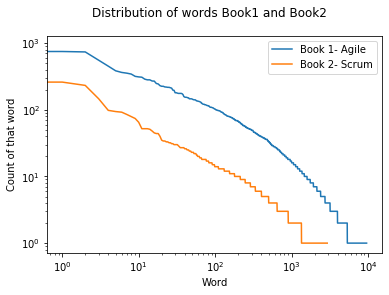

In [23]:

# preparing data
# agile
agileCount = agileNoStopRDD.map(lambda x: x[1]).collect()
agileWord = agileNoStopRDD.map(lambda x: x[0]).collect()
# scrum
scrumCount = scrumNoStopRDD.map(lambda x: x[1]).collect()
scrumWord = scrumNoStopRDD.map(lambda x: x[0]).collect()


agileRanks = np.arange(0, len(agileWord))
minm = min(agileRanks)
maxm = max(agileRanks)

scrumRanks = np.arange(0, len(scrumWord))
minm1 = min(scrumRanks)
max1 = max(scrumRanks)



# agileWord[]

b1 = plt.loglog(agileRanks, agileCount, basex=10)
# plt.hist(agileRanks, bins = 10, range = (minm, maxm))

b2 = plt.loglog(scrumRanks, scrumCount, basex=10)
plt.suptitle('Distribution of words Book1 and Book2')
plt.legend((b1[0], b2[0]), ('Book 1- Agile','Book 2- Scrum'))
plt.xlabel('Word')
plt.ylabel('Count of that word')
plt.show()

## Explanation: 
The line chart depicts the Agile and Scrum book's word distribution in log base 10 scale. Both of these book have similar word frequency and word distribution.

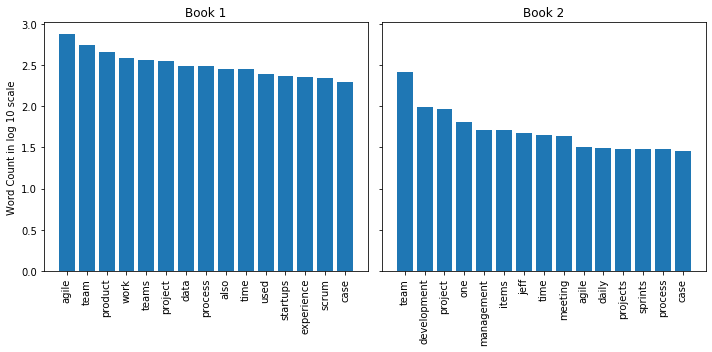

In [26]:
# Comparing Top 15 Words of Each Book
# loading data
agileUniqueRDD2 = agileUniqueRDD.map(lambda x: (x[0], np.log10(x[1])))
scrumUniqueRDD2 = scrumUniqueRDD.map(lambda x: (x[0], np.log10(x[1])))
x = agileUniqueRDD2.map(lambda x: x[0]).take(15)
y = agileUniqueRDD2.map(lambda x: x[1]).take(15)
u = scrumUniqueRDD2.map(lambda x: x[0]).take(15)
v = scrumUniqueRDD2.map(lambda x: x[1]).take(15)
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5), tight_layout=True, sharey=True)

# plot
ax1.bar(x, y)
ax1.set_xticklabels(x, rotation='vertical')
ax1.set_ylabel('Word Count in log 10 scale')
ax1.set_title('Book 1')
ax2.bar(u,v)
ax2.set_xticklabels(u, rotation='vertical')
ax2.set_title('Book 2')
plt.show()

## Explanation: 
The bar graphs portray the picture of top 15 most common word for the Agile and Scrum book. These graphs show the commonality of the books. Among top 15 most frequent words these books have 5 words common. 